### NB(Naive Bayes) on Amazon Fine Food Reviews

DataSet Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

In [1]:
#Importing Necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loding a Bow data
import pickle
with open('train_bow.pickle','rb') as handle:
    train_bow = pickle.load(handle)
with open('test_bow.pickle','rb') as handle:
    test_bow = pickle.load(handle)

In [3]:
#Loding a Tfidf data
import pickle
with open('train_tfidf.pickle','rb') as handle:
    train_tfidf = pickle.load(handle)
with open('test_tfidf.pickle','rb') as handle:
    test_tfidf = pickle.load(handle)

In [4]:
#Loding a Avg Word2vec data
import pickle
with open('train_avg_word2vec.pickle','rb') as handle:
    train_avg_word2vec = pickle.load(handle)
with open('test_avg_word2vec.pickle','rb') as handle:
    test_avg_word2vec = pickle.load(handle)

In [5]:
#Loding a Avg tfidf Word2Vec data
import pickle
with open('train_tfidf_word2vec.pickle','rb') as handle:
    train_tfidf_word2vec = pickle.load(handle)
with open('test_tfidf_word2vec.pickle','rb') as handle:
    test_tfidf_word2vec = pickle.load(handle)

In [6]:
#Loding responses(y)
with open('y_train.pickle','rb') as handle:
    y_train = pickle.load(handle)
with open('y_test.pickle','rb') as handle:
    y_test = pickle.load(handle)

In [14]:
#Loding responses(y)
with open('y_train_w.pickle','rb') as handle:
    y_train_w = pickle.load(handle)
with open('y_test_w.pickle','rb') as handle:
    y_test_w = pickle.load(handle)

In [8]:
from sklearn.preprocessing import normalize
# Feature Normalization.
train_bow_normalize = normalize(train_bow, axis=0)
test_bow_normalize = normalize(test_bow, axis=0)

train_tfidf_normalize = normalize(train_tfidf, axis=0)
test_tfidf_normalize = normalize(test_tfidf, axis=0)

train_avgw2v_normalize = normalize(train_avg_word2vec, axis=0)
test_avgw2v_normalize = normalize(test_avg_word2vec, axis=0)

train_tfidfw2v_normalize = normalize(train_tfidf_word2vec, axis=0)
test_tfidfw2v_normalize = normalize(test_tfidf_word2vec, axis=0)

### Featurization: Bag of Words


The optimal value of alpha is 20.


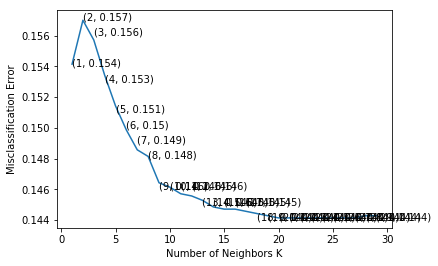

The misclassification error for each 'a' value is :  [0.1541 0.157  0.1557 0.1534 0.1514 0.1499 0.1486 0.1481 0.1464 0.1461
 0.1457 0.1456 0.1453 0.1449 0.1447 0.1447 0.1446 0.1444 0.1443 0.1441
 0.1441 0.1441 0.1441 0.1441 0.1441 0.1441 0.1441 0.1443 0.1443]


In [9]:
#Creating list of alphas for NB
alphaList = list(range(1,30))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for a in alphaList:
    nb = BernoulliNB(alpha=a)
    scores = cross_val_score(nb, train_bow_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best alpha
optimal_a = alphaList[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is %d.' % optimal_a)

# plot misclassification error vs k 
plt.plot(alphaList, MSE)
for xy in zip(alphaList, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each 'a' value is : ", np.round(MSE,4))

In [10]:
#Create a Bernoulli Naive Bayes Classifier
model = BernoulliNB(alpha=optimal_a)
#Train the model using the training sets 
model.fit(train_bow_normalize, y_train)
#Predict Output 
predicted= model.predict(test_bow_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, predicted) * 100
print('\nThe accuracy of the NB classifier is %f%%' % (acc))
pre = precision_recall_fscore_support(y_test, predicted)
print(pre)
conf_matrix = confusion_matrix(y_test,predicted)
print(conf_matrix)


The accuracy of the NB classifier is 82.900000%
(array([0.        , 0.82955304]), array([0.        , 0.99919646]), array([0.        , 0.90650629]), array([ 511, 2489], dtype=int64))
[[   0  511]
 [   2 2487]]


### Featurization: Tfidf


The optimal value of alpha is 20.


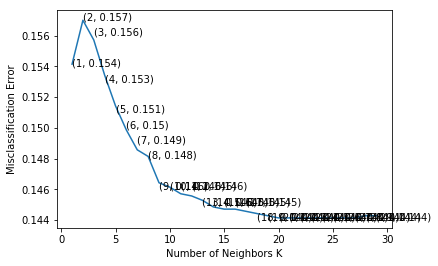

The misclassification error for each 'a' value is :  [0.1541 0.157  0.1557 0.1534 0.1514 0.1499 0.1486 0.1481 0.1464 0.1461
 0.1457 0.1456 0.1453 0.1449 0.1447 0.1447 0.1446 0.1444 0.1443 0.1441
 0.1441 0.1441 0.1441 0.1441 0.1441 0.1441 0.1441 0.1443 0.1443]


In [11]:
#Creating list of alphas for NB
alphaList = list(range(1,30))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for a in alphaList:
    nb = BernoulliNB(alpha=a)
    scores = cross_val_score(nb, train_tfidf_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best alpha
optimal_a = alphaList[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is %d.' % optimal_a)

# plot misclassification error vs k 
plt.plot(alphaList, MSE)
for xy in zip(alphaList, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each 'a' value is : ", np.round(MSE,4))

In [12]:
#Create a Bernoulli Naive Bayes Classifier
model = BernoulliNB(alpha=optimal_a)
#Train the model using the training sets 
model.fit(train_tfidf_normalize, y_train)
#Predict Output 
predicted= model.predict(test_tfidf_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, predicted) * 100
print('\nThe accuracy of the NB classifier is %f%%' % (acc))
pre = precision_recall_fscore_support(y_test, predicted)
print(pre)
conf_matrix = confusion_matrix(y_test,predicted)
print(conf_matrix)


The accuracy of the NB classifier is 82.900000%
(array([0.        , 0.82955304]), array([0.        , 0.99919646]), array([0.        , 0.90650629]), array([ 511, 2489], dtype=int64))
[[   0  511]
 [   2 2487]]


### Featurization: Avg Word2Vec


The optimal value of alpha is 29.


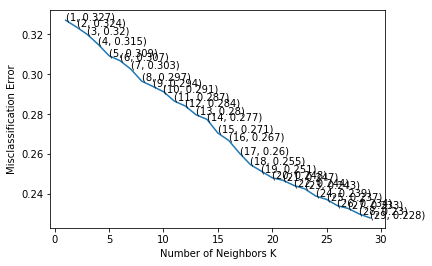

The misclassification error for each 'a' value is :  [0.3271 0.3237 0.32   0.315  0.3093 0.3069 0.3026 0.2966 0.294  0.2913
 0.2866 0.2841 0.2797 0.2774 0.2706 0.2669 0.2604 0.2547 0.2514 0.2481
 0.2469 0.2443 0.2426 0.239  0.2373 0.2341 0.2327 0.23   0.228 ]


In [15]:

#Creating list of alphas for NB
alphaList = list(range(1,30))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for a in alphaList:
    nb = BernoulliNB(alpha=a)
    scores = cross_val_score(nb, train_avgw2v_normalize, y_train_w, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best alpha
optimal_a = alphaList[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is %d.' % optimal_a)

# plot misclassification error vs k 
plt.plot(alphaList, MSE)
for xy in zip(alphaList, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each 'a' value is : ", np.round(MSE,4))

In [16]:
#Create a Bernoulli Naive Bayes Classifier
model = BernoulliNB(alpha=optimal_a)
#Train the model using the training sets 
model.fit(train_avgw2v_normalize, y_train_w)
#Predict Output 
predicted= model.predict(test_avgw2v_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test_w, predicted) * 100
print('\nThe accuracy of the NB classifier is %f%%' % (acc))
pre = precision_recall_fscore_support(y_test_w, predicted)
print(pre)
conf_matrix = confusion_matrix(y_test_w,predicted)
print(conf_matrix)


The accuracy of the NB classifier is 81.533333%
(array([0.25842697, 0.83236001]), array([0.04500978, 0.97348333]), array([0.07666667, 0.89740741]), array([ 511, 2489], dtype=int64))
[[  23  488]
 [  66 2423]]


### Featurization: Tfidf Weighted Word2Vec


The optimal value of alpha is 29.


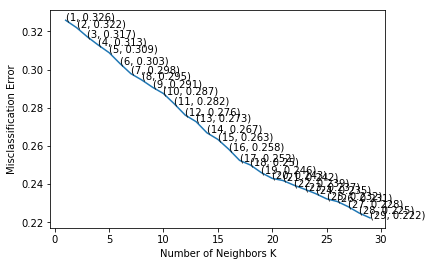

The misclassification error for each 'a' value is :  [0.3259 0.322  0.3171 0.3129 0.3089 0.3031 0.2979 0.2946 0.2907 0.2874
 0.282  0.2761 0.2727 0.2669 0.2634 0.2583 0.2524 0.25   0.246  0.243
 0.2419 0.2394 0.2373 0.235  0.2323 0.2309 0.2281 0.2249 0.2223]


In [17]:
#Creating list of alphas for NB
alphaList = list(range(1,30))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for a in alphaList:
    nb = BernoulliNB(alpha=a)
    scores = cross_val_score(nb, train_tfidfw2v_normalize, y_train_w, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best alpha
optimal_a = alphaList[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is %d.' % optimal_a)

# plot misclassification error vs k 
plt.plot(alphaList, MSE)
for xy in zip(alphaList, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each 'a' value is : ", np.round(MSE,4))

In [18]:
#Create a Bernoulli Naive Bayes Classifier
model = BernoulliNB(alpha=optimal_a)
#Train the model using the training sets 
model.fit(train_tfidfw2v_normalize, y_train_w)
#Predict Output 
predicted= model.predict(test_tfidfw2v_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test_w, predicted) * 100
print('\nThe accuracy of the NB classifier is %f%%' % (acc))
pre = precision_recall_fscore_support(y_test_w, predicted)
print(pre)
conf_matrix = confusion_matrix(y_test_w,predicted)
print(conf_matrix)


The accuracy of the NB classifier is 82.933333%
(array([0.45454545, 0.83071261]), array([0.00978474, 0.99758939]), array([0.01915709, 0.90653523]), array([ 511, 2489], dtype=int64))
[[   5  506]
 [   6 2483]]


#### Observation:

* Bow------------------>alpha=20------------>Accuracy:82.90%
* Tfidf---------------->alpha=20------------>Accuracy:82.90%
* Avg Word2Vec--------->alpha=29----------->Accuracy:81.53%
* Tfidf Word2Vec------->alpha=29----------->Accuracy:82.93%
* Among all the featurization techniques, we are getting slightly better accuracy with Tfidf Weighted word2vec